รายงานแสดงผลการทำนายโรคซึมเศร้า(Psycology)

In [44]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [45]:
patient = pd.read_excel('Psycology.xls')
patient.head()

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,Male,28,5,3,5-6 ชั่วโมง,อาหารสุขภาพ,Yes,8,3,Yes,Yes
1,Male,23,5,2,มากกว่า 8 ชั่วโมง,อาหารทั่วไป,No,10,4,No,Yes
2,Female,23,1,3,น้อยกว่า 5 ชั่วโมง,อาหารสุขภาพ,Yes,0,3,No,No
3,Female,20,5,5,มากกว่า 8 ชั่วโมง,Junkfood,Yes,2,5,No,Yes
4,Male,29,4,3,มากกว่า 8 ชั่วโมง,Junkfood,Yes,1,3,No,Yes


In [46]:
patient.shape

(502, 11)

In [47]:
patient.columns

Index(['เพศ', 'อายุ', 'เคยมีแฟนมาแล้ว  (คน)',
       'จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์', 'ระยะเวลาการนอน',
       'นิสิยการกินอาหาร', 'เคยคิดฆ่าตัวตาย',
       'จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์',
       'ระดับความเครียดด้านการเงิน', 'เคยกินยานอนหลับ', 'ภาวะซึมเศร้า'],
      dtype='object')

In [48]:
patient['ภาวะซึมเศร้า'].value_counts()

ภาวะซึมเศร้า
Yes    252
No     250
Name: count, dtype: int64

In [49]:
col_names = patient.columns.tolist() 
feature_cols = col_names[:-1] 
X = patient[feature_cols]  
y = patient['ภาวะซึมเศร้า']  

# แปลงข้อมูลหมวดหมู่ใน X ให้เป็น One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# แปลงข้อมูลเป้าหมาย (Target Variable) ให้เป็นตัวเลข (ถ้าจำเป็น)
labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y) 

In [50]:
# แบ่งข้อมูลออกเป็นชุดฝึก (train) และชุดทดสอบ (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=1)

# สร้างโมเดล Decision Tree และฝึกโมเดล
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)

# ทดสอบความแม่นยำบนชุดทดสอบ
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# ประเมินผลด้วย Cross-Validation
scores = cross_val_score(clf, X_encoded, y_encoded, cv=5)
print("Cross-Validation Accuracy:", scores.mean())




              precision    recall  f1-score   support

           0       0.77      0.80      0.78        84
           1       0.73      0.70      0.72        67

    accuracy                           0.75       151
   macro avg       0.75      0.75      0.75       151
weighted avg       0.75      0.75      0.75       151

Accuracy: 0.7549668874172185
Cross-Validation Accuracy: 0.7710693069306931


In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO, BytesIO # ใช้ io.StringIO แทน six.StringIO
from PIL import Image
from IPython.display import Image
import matplotlib.image as mpimg

In [52]:
# แทนที่ feature_names ด้วยคอลัมน์จาก X_encoded
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=X_encoded.columns,  # ใช้ฟีเจอร์จาก X_encoded
    class_names=["0", "1"],
)


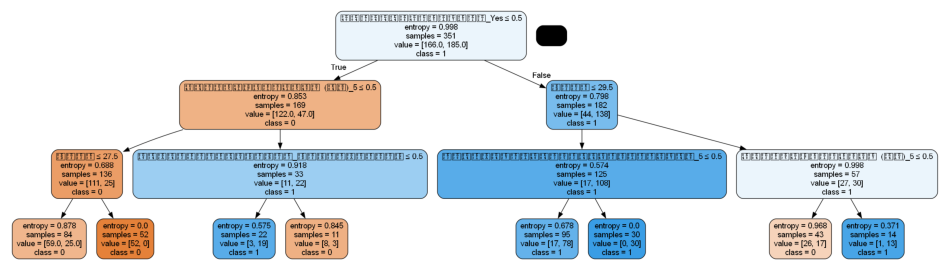

In [53]:
# สร้างกราฟ
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# แปลงเป็น PNG
png_image = graph.create_png()

# ใช้ BytesIO เพื่อแสดงรูป
image_stream = BytesIO(png_image)

# ใช้ matplotlib เพื่อแสดงผล
plt.figure(figsize=(12, 12))
img = mpimg.imread(image_stream, format='png')
plt.imshow(img)
plt.axis('off')
plt.show()